In [15]:
#Getting the data into a pandas DataFrame
import pandas as pd

taxi_trips = pd.read_csv('https://raw.githubusercontent.com/1122131uhi/1122131_DataAnalytics/master/results-20200720-204551.csv')

#show the head
taxi_trips.head()

,day,year,mo,da,pickup_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_TRIPS
0,4,2009,1,1,2009-01-01,12.2,2.8,1012.6,11.4,18.5,26.0,33.0,21.2,5.0,0.55,5.1,0,327625
1,5,2009,1,2,2009-01-02,20.0,12.0,1015.5,13.7,7.4,20.0,21.0,39.9,5.0,0.00,3.1,0,376708
2,6,2009,1,3,2009-01-03,30.0,20.2,1007.1,11.7,10.8,18.1,24.1,35.1,26.6,0.00,2.0,0,432710
3,7,2009,1,4,2009-01-04,26.1,13.7,1012.4,15.0,11.5,17.1,24.1,35.6,21.2,0.00,2.0,0,367525
4,1,2009,1,5,2009-01-05,31.2,24.7,1012.2,13.1,3.9,8.9,999.9,41.0,19.4,0.00,1.2,0,370901


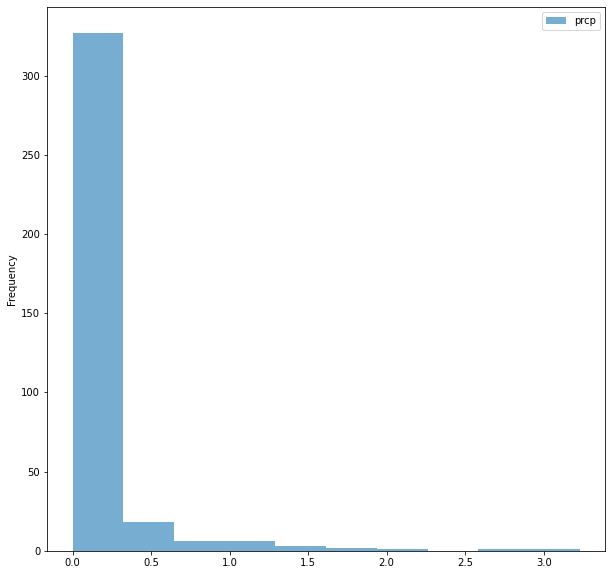

In [23]:
import matplotlib.pyplot as plt

#replace all values over 99 in prcp with 0
taxi_trips.loc[taxi_trips['prcp'] > 99, 'prcp'] = 0


taxi_trips.plot(kind='hist', y='prcp', alpha=0.6, figsize=(10, 10))
plt.show()

#Histogram below shows most of the data entries are zero which may indicate there was very little precipitation recorded.

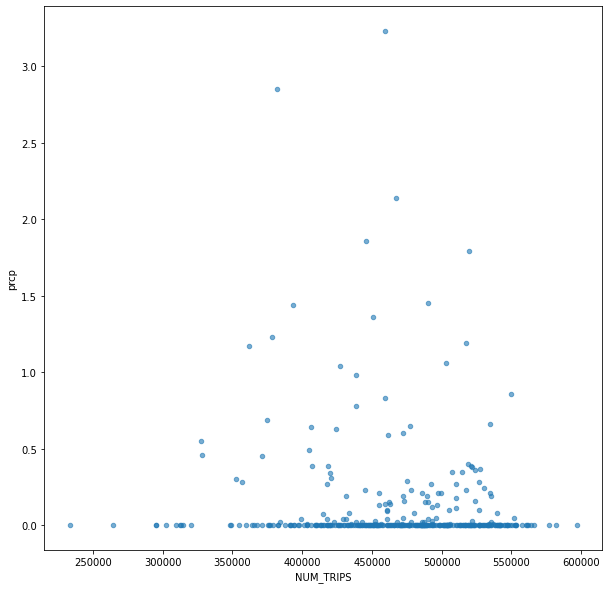

In [16]:
taxi_trips.plot(kind='scatter', x='NUM_TRIPS', y='prcp', alpha=0.6, figsize=(10, 10))
plt.show()

#Scatterplot below shows that, of the days where precipitation was recorded, the majority of them had a higher amount of taxi trips. 

In [2]:

#A note about looking for a linear correlation for days of the week...
taxi_trips.plot(kind='scatter', x='NUM_TRIPS', y='day', lpha=0.6, figsize=(10, 10))
plt.show()

#Regarding this data it makes no sense to look for a linear correlation because this data is not numerical, it is categorical.
#So even if you did move Sunday to the start it is incorrect to say that it has a high linear correlation with NUM_TRIPS.

NameError: name 'taxi_trips' is not defined